In [1]:
import MARRAKECH
from strategies import random_plan, flatMC, BestMoveUCT, UCB
from utils import *

In [2]:
strat_dictionary = {'random':random_plan, 'flat':flatMC, 'flat_score':flatMC, 'ucb':UCB, 'ucb_score':UCB, 'uct':BestMoveUCT, 'uct_score':BestMoveUCT}
search_strategies = ['random', 'flat', 'flat_score', 'ucb', 'ucb_score', 'uct', 'uct_score'] 

## 1st Experiment:

We play all the strategies again RANDOM strategy for 20 games. We plot the mean score for different number of playouts

In [81]:
n_games=20
n_playouts=[10, 25, 50, 100, 200, 300, 400, 500, 600]

fig = go.Figure()

L_res = []
for strat in search_strategies:
    print(f'########## {strat} VS random. ##########')
    if strat.endswith('score'):
            use_score1=True
    else:
            use_score1=False
    L = []
    for n in n_playouts:
            _, _, _, mean_score = game_simulation(n_games, strategy1=strat_dictionary[strat], strategy2=random_plan, 
                                                                 n_playouts=n, use_score1=use_score1, 
                                                                 use_score2=False, verbose=False)
            L.append(mean_score)
            print(f'n = {n}\tmean_score = {mean_score}')

    L_res.append(L)
    fig.add_trace(go.Scatter(x=n_playouts, y=L, name=f'{strat}', ))
    
fig.update_layout(title=f'Strategies vs RANDOM: mean score per number of playouts for {n_games} games',
                      legend_title_text='Strategies',
                      xaxis_title='Number of playouts',
                      yaxis_title='Mean score')
save_pkl(L_res, 'results_exp1')

fig


# 2nd Experiment:

A tournament of all strategies 100 games and 50 playouts.

In [150]:
exp2_winR, exp2_meanSc = tournament(n_games=100, n_playouts=50)

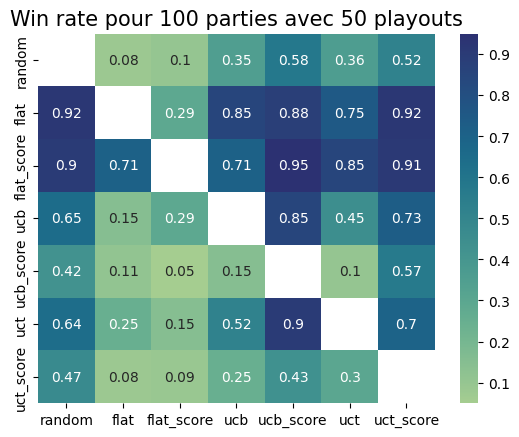

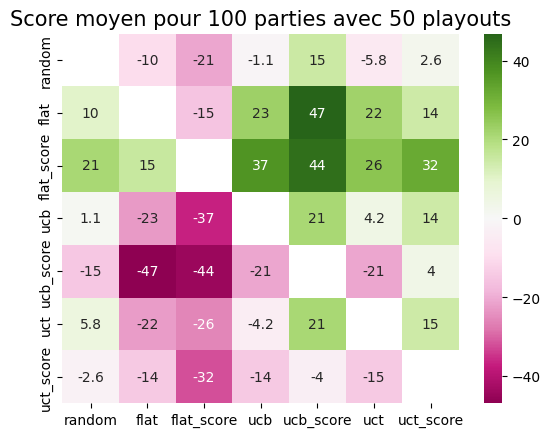

In [153]:
heatmap_gen(exp2_winR, exp2_meanSc, n_games=100, n_playouts=50, list_strats=search_strategies)


# 3rd Experiment:

A tournament of all strategies 100 games and 300 playouts.

In [17]:
exp3_winR, exp3_meanSc = tournament(n_games=100, n_playouts=300)

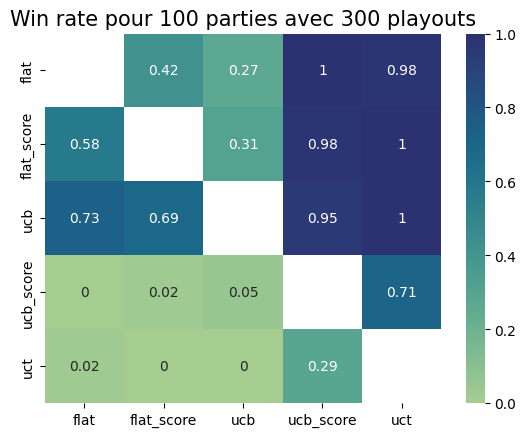

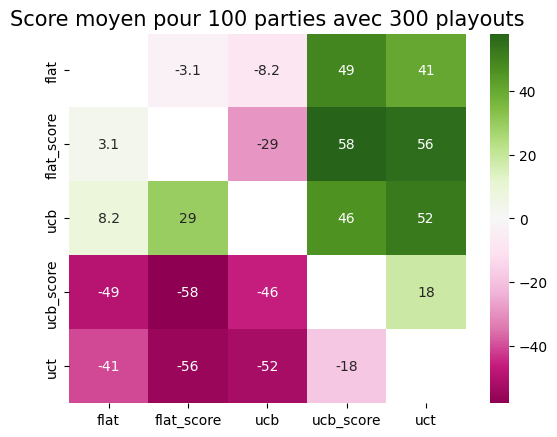

In [24]:
search_strategies_red = ['flat', 'flat_score', 'ucb', 'ucb_score', 'uct'] 
heatmap_gen(exp3_winR, exp3_meanSc, n_games=100, n_playouts=300, list_strats=search_strategies_red)